## The ENTSO-E transparency platform

[The ENTSO-E transparency platform](https://transparency.entsoe.eu/) serves as a comprehensive source for various types of power system data. It encompasses six primary data categories: load, generation, transmission, balancing, outages, and congestion management. Most of these categories feature different time series, such as actual or forecasted load data. In addition to the user interface on their website, the platform also offers a RESTful API for data retrieval. 

To access data via the API, you'll need an API key. Registration on their website is straightforward – if you haven't already signed up, you can do so to obtain an access key.


## entsoe-py

To access data from the API, you could write your own code. However, be prepared for the challenging task of XML parsing. Fortunately, there is Python package called [entsoe-py](https://github.com/EnergieID/entsoe-py) that I am using here to retrieve data from ENTSO-E. Before diving into that, I would like to acknowledge one of its notable contributors.

### Contributors

Contributing to open-source projects like this one is immensely valuable to the power system modeling community and is deeply appreciated.

One contributor whose work has been particularly beneficial to me (among many others) is Frank Boerman. Unfortunately, I don’t know him personally, but his contributions have significantly advanced the accessibility of power system data for Python programmers and others. As of January 9, 2024, he has made 60 commits to the [entsoe-py](https://github.com/EnergieID/entsoe-py) package.

Additionally, Frank appears to be the lead maintainer of the [jao-py](https://github.com/fboerman/jao-py) Python package, which facilitates access to FBMC data from JAO. He has also integrated some of this data into well-organized [Grafana dashboards](https://data.boerman.dev/d/v6CjDFBGk/homepage-energy-version?orgId=1), which I highly recommend exploring.

Furthermore, he runs a [blog](https://boerman.dev/) focusing on energy market-related topics, offering valuable insights and information.

### Installation
The entsoe-py package is on [PyPI](https://pypi.org/project/entsoe-py/) an can be installed via pip.
```
pip install entsoe-py
```
The code can be found [here on GitHub](https://github.com/EnergieID/entsoe-py).

The latest version 0.6.2 requires pandas 1.4.0 or higher.

### Package structure
The package features two primary classes: `EntsoeRawClient` and `EntsoePandasClient`. While they share the same input parameters, their key difference lies in the format of the returned data. Using `EntsoeRawClient` will return data in XML format, requiring users to handle their own parsing. On the other hand, `EntsoePandasClient` is perhaps the more convenient and widely used interface, as it integrates seamlessly with the Pandas library, simplifying data handling and analysis.

## Reading data

### Initializing the Pandas client
To begin, let's read data from the ENTSO-E transparency platform. In the example below, I'll demonstrate using the `dotenv` library to import my ENTSO-E API key from environment variables. This approach is particularly useful for keeping sensitive information secure. If you're running your code in a local environment and prefer simplicity, you can directly insert your API key into the code. However, be cautious with this method, especially if sharing your code, as it exposes your key to potential security risks.

In [1]:
import os

import pandas as pd
from dotenv import load_dotenv
from entsoe import EntsoePandasClient

load_dotenv()
ENTSOE_API_KEY = os.environ["ENTSOE_API_KEY"]
client = EntsoePandasClient(api_key=ENTSOE_API_KEY)

To retrieve specific time series data from the ENTSO-E platform, it's crucial to call the corresponding function in the entsoe-py package. Each time series data type, like load forecasts or day-ahead prices, has a dedicated function – for instance, `query_load_forecast()` for load forecasts and `query_day_ahead_prices()` for day-ahead prices. You can find a comprehensive list of these functions on the [entsoe-py's GitHub page](https://github.com/EnergieID/entsoe-py).

In the following example, I demonstrate how to retrieve the day-ahead price data for Germany spanning three and a half years. It's important to note that querying data over extended periods, such as more than one year, can be time-consuming due to the necessary pagination. Be prepared for this process to take several seconds.

In [2]:
prices = client.query_day_ahead_prices(
    country_code="DE_LU",
    start=pd.Timestamp("2020-01-01", tz="CET"),
    end=pd.Timestamp("2023-06-01", tz="CET"),
)

What we get back is a pandas Series.

In [3]:
type(prices)

pandas.core.series.Series

The index is a proper pandas DatetimeIndex with the correct time zone, which is quite useful when merging with other time series.

In [4]:
type(prices.index)

pandas.core.indexes.datetimes.DatetimeIndex

Let's have a sanity check and plot these prices.

<Axes: >

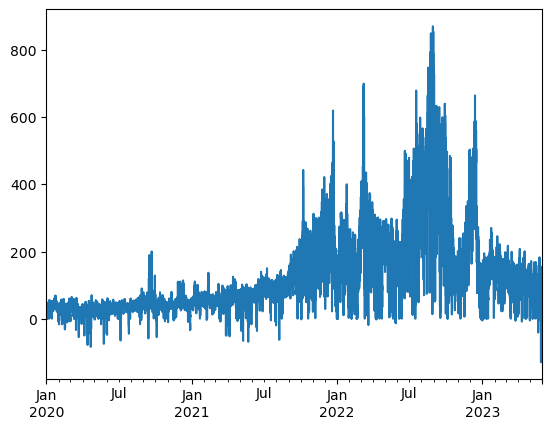

In [5]:
prices.plot()

## Summary
The ENTSO-E transparency platform stands out as a crucial source for open power system data, catering to a wide range of needs within the power system modeling community. The entsoe-py Python package significantly simplifies the process of accessing this data through the ENTSO-E API. Credit goes to contributors like Frank Boerman, whose efforts have led to the development of user-friendly interfaces such as `EntsoePandasClient`. This particular interface enables the seamless integration of power system data directly into Pandas Series or DataFrames, enhancing the ease and efficiency of data analysis and handling

## Links


Check out the [user guide for the Transparency Platform RESTful API ](https://transparency.entsoe.eu/content/static_content/Static%20content/web%20api/Guide.html) if you want to dig deeper.

Here’s the link to the [entsoe-py's GitHub page](https://github.com/EnergieID/entsoe-py) again, for quick access